<a href="https://colab.research.google.com/github/Gcarmnonapy7/higgs-boson/blob/main/higgs_boson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install -q xgboost lightgbm

In [2]:
from google.colab import files
import zipfile

In [3]:
data = files.upload()

Saving higgs-boson.zip to higgs-boson.zip


In [4]:
with zipfile.ZipFile('/content/higgs-boson.zip','r') as zip_data :
  zip_data.extractall('/content/')

In [5]:
def extract_files_zip(path_zip,path_extract):
  with zipfile.ZipFile(path_zip,'r') as zip_data :
    zip_data.extractall(path_extract)

In [6]:
files_path = ["/content/training.zip","/content/test.zip"]

In [7]:
for i in files_path:
  extract_files_zip(i,"/content/")

In [8]:
#Data cleaning and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Model preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [11]:
df_train = pd.read_csv("/content/training.csv")
df_test = pd.read_csv("/content/test.csv")

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [13]:
mapping = {
    "b":0,
    "s":1
}
df_train["Label"] = df_train["Label"].map(mapping)

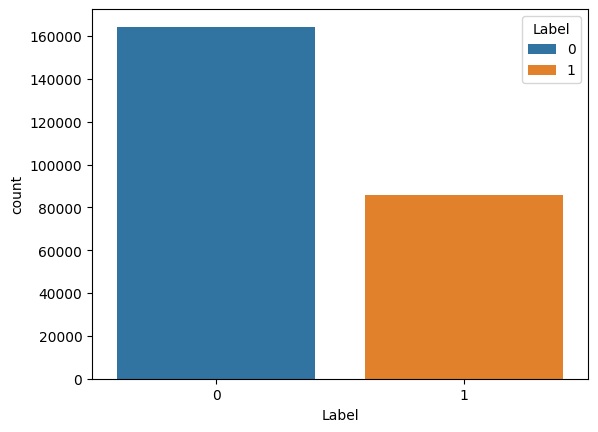

In [14]:
sns.countplot(data=df_train,x="Label",hue="Label")
plt.show()

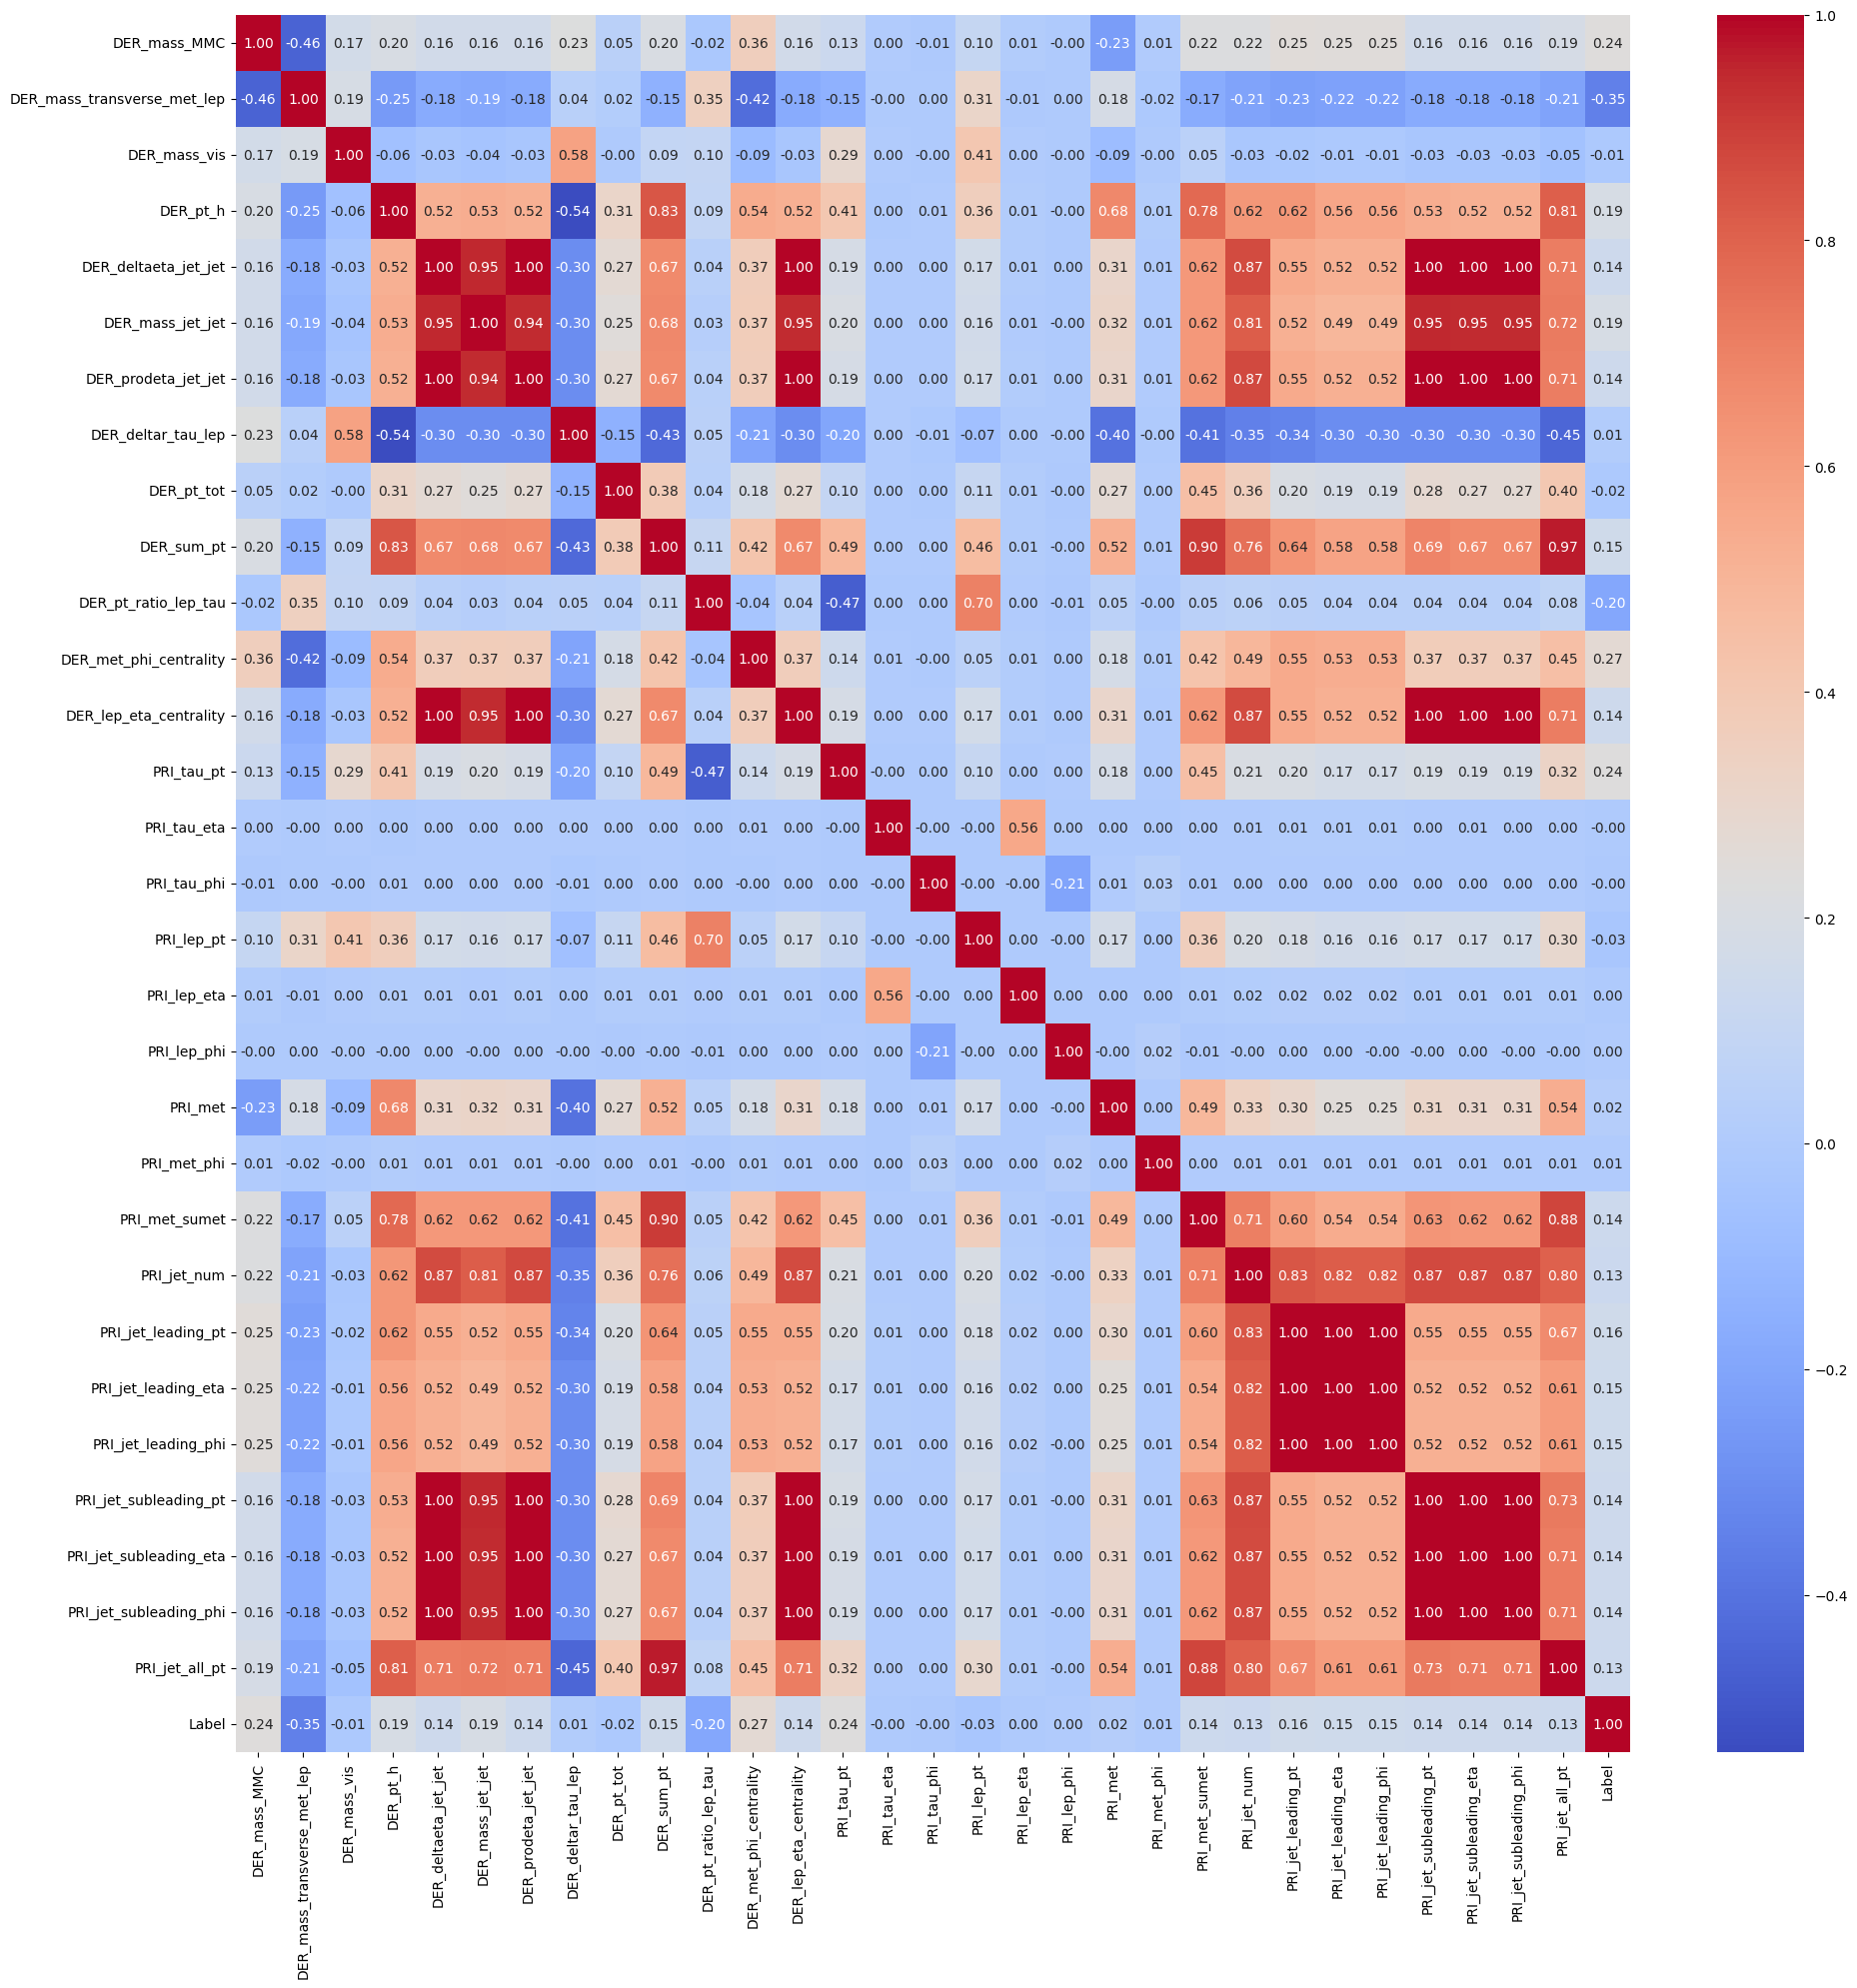

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.drop(columns=["Weight","EventId"]).corr(),annot=True,fmt=".2f",cmap="coolwarm")
plt.tight_layout()
plt.show()

In [16]:
missing = (df_train == -999.0).sum()
print(missing)
df_train.replace(-999.0,np.nan,inplace=True)
df_train.isna().sum()

EventId                             0
DER_mass_MMC                    38114
DER_mass_transverse_met_lep         0
DER_mass_vis                        0
DER_pt_h                            0
DER_deltaeta_jet_jet           177457
DER_mass_jet_jet               177457
DER_prodeta_jet_jet            177457
DER_deltar_tau_lep                  0
DER_pt_tot                          0
DER_sum_pt                          0
DER_pt_ratio_lep_tau                0
DER_met_phi_centrality              0
DER_lep_eta_centrality         177457
PRI_tau_pt                          0
PRI_tau_eta                         0
PRI_tau_phi                         0
PRI_lep_pt                          0
PRI_lep_eta                         0
PRI_lep_phi                         0
PRI_met                             0
PRI_met_phi                         0
PRI_met_sumet                       0
PRI_jet_num                         0
PRI_jet_leading_pt              99913
PRI_jet_leading_eta             99913
PRI_jet_lead

,0
EventId,0
DER_mass_MMC,38114
DER_mass_transverse_met_lep,0
DER_mass_vis,0
DER_pt_h,0
DER_deltaeta_jet_jet,177457
DER_mass_jet_jet,177457
DER_prodeta_jet_jet,177457
DER_deltar_tau_lep,0
DER_pt_tot,0


<Axes: xlabel='DER_mass_MMC', ylabel='Count'>

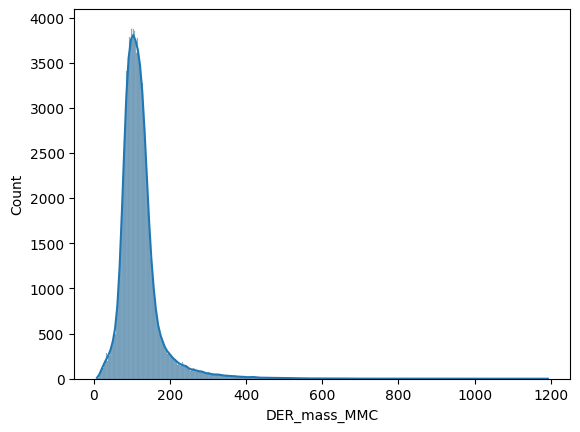

In [17]:
sns.histplot(df_train["DER_mass_MMC"],kde=True)